#### [산점도 그래프]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [2]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# [2] 데이터 준비
F_DATA = r'C:\Users\kdp\KDT_06\KDT\EX_PY06\KDT\EX_PANDAS06\DAY04\auto_mpg.csv'

In [4]:
# [3] CSV ==> DataFrame으로 저장
dataDF = pd.read_csv(F_DATA)

In [5]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
# [4] 연비와 관련이 높은 컬럼, 즉 변수 확인
# - [4-1] 상관계수 확인
corrSR = dataDF.corr(numeric_only=True)['mpg']
round(corrSR['weight'],2),corrSR

(-0.83,
 mpg             1.000000
 cylinders      -0.775396
 displacement   -0.804203
 weight         -0.831741
 acceleration    0.420289
 model year      0.579267
 origin          0.563450
 Name: mpg, dtype: float64)

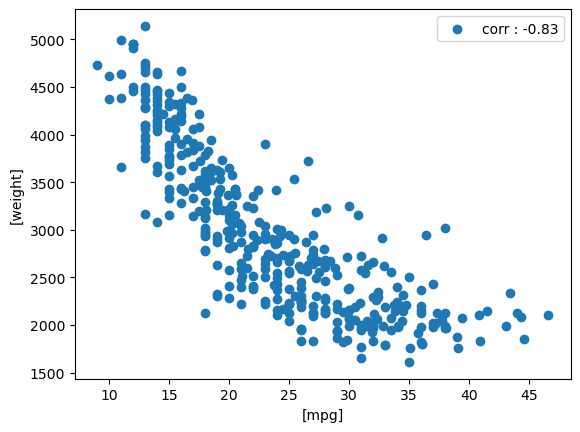

In [7]:
# [4-2] 시각화
plt.scatter(dataDF['mpg'],dataDF['weight'],label = f"corr : {round(corrSR['weight'],2)}")
plt.xlabel('[mpg]')
plt.ylabel('[weight]')
plt.legend()
plt.show()

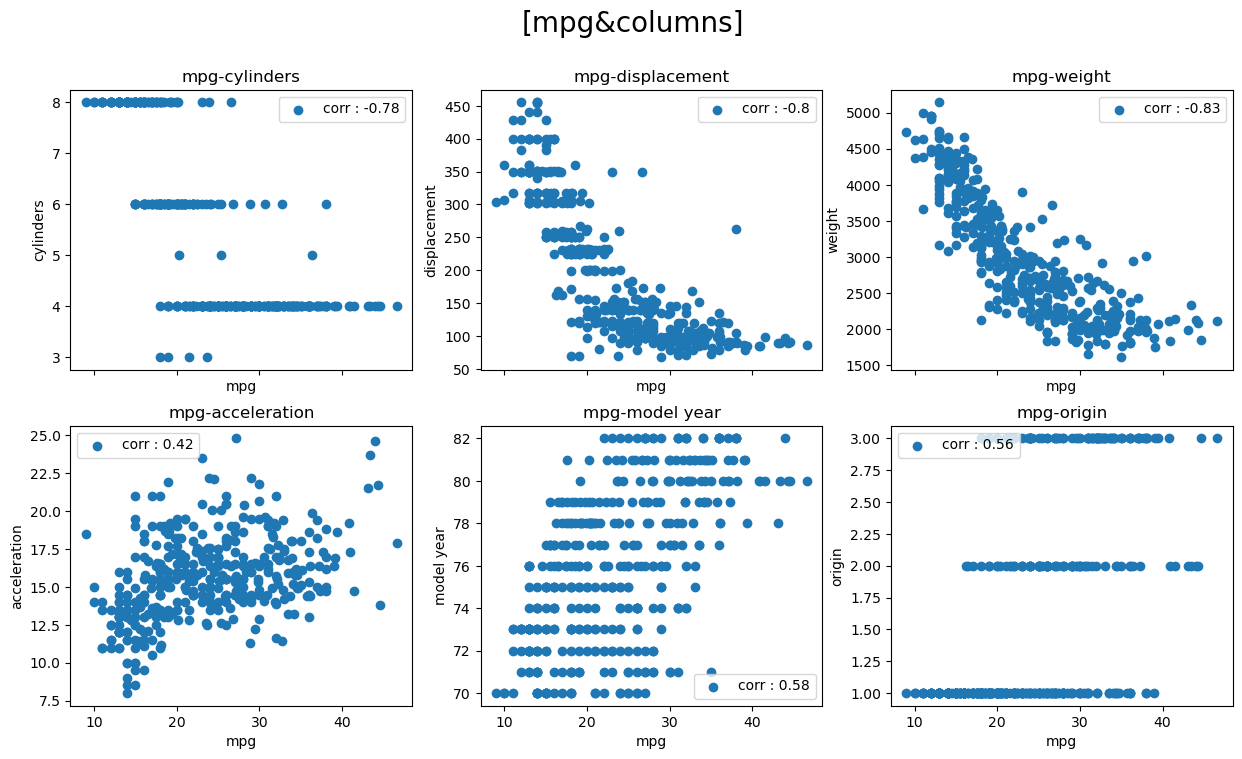

In [8]:
# [4-3] mpg컬럼과 다른 컬럼간의 관계 시각화
# - (1) 그래프 담을 창 생성
fig = plt.figure(figsize= (15,8))

# - (2) 그래프 담을 공간 생성 axes
axs = fig.subplots(2,3,sharex=True)
for row in range(2):
    for col in range(3):
        # 컬럼명 가져오기
        col_name = corrSR.index[row*3+col+1]
        axs[row,col].scatter(dataDF['mpg'],dataDF[col_name],label = f"corr : {round(corrSR[col_name],2)}")
        axs[row,col].legend()
        axs[row,col].set_ylabel(col_name)
        axs[row,col].set_xlabel('mpg')
        axs[row,col].set_title(f'mpg-{col_name}')
fig.suptitle("[mpg&columns]",fontsize = 20)
plt.show()

- [5] 연비와 무게, 실린더 수의 관계 시각화
    * 연비와 무게 반비례 관계, 상관 관계가 높음
    * 연비와 실린더 개수도 반비례

In [19]:
dataDF['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

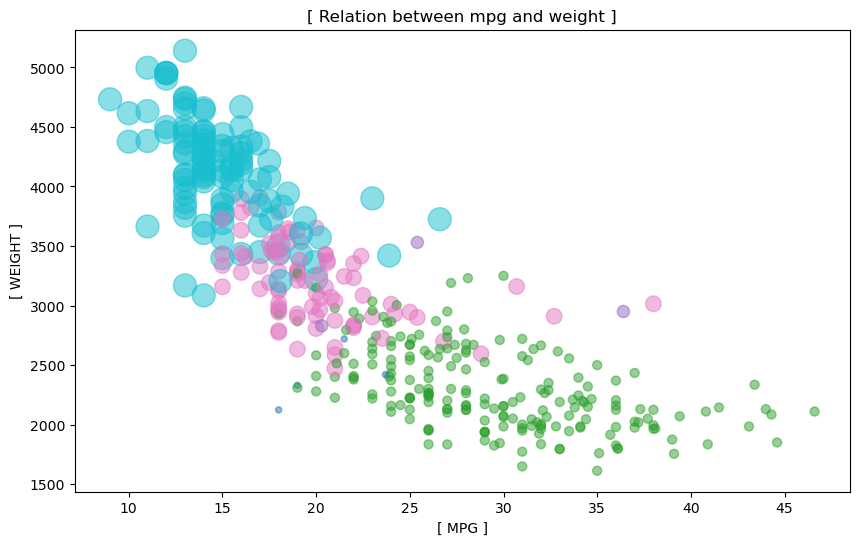

In [49]:
# - mpg와 weight 관계 산점도(scatter) 시각화
plt.figure(figsize=(10,6))
plt.scatter(dataDF['mpg'],dataDF['weight'], 
            s=dataDF['cylinders']**2.7, 
            c=[dataDF['cylinders']], cmap='tab10',alpha = 0.5)
plt.title('[ Relation between mpg and weight ]')
plt.xlabel('[ MPG ]')
plt.ylabel('[ WEIGHT ]')
plt.show()